In [1]:
import math
import random 
import statistics
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import set_option
from numpy import mean
from numpy import std
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Dropout
import tensorflow as tf
from keras.callbacks import Callback
from keras import backend
from keras.layers import Dense, BatchNormalization, Dropout
from  tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import floor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from numpy import sqrt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from numpy.random import seed
import warnings
warnings.filterwarnings('ignore')
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Bidirectional
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_gamma_deviance, mean_poisson_deviance
from math import sqrt

In [2]:
import talib
from talib.abstract import *

In [3]:
Close = pd.read_csv("amazon_data_close.csv",header=0, index_col=0, parse_dates=True)
Close

,ADD,MULT,Open_ATAN,High_ATAN,Low_ATAN,Close_ATAN,High_CEIL,Low_CEIL,Close_CEIL,High_FLOOR,...,High_min_lag:1_win:2,High_max_lag:1_win:2,High_mean_lag:1_win:2,High,Low_lag:1,Low_min_lag:1_win:2,Low_max_lag:1_win:2,Low_mean_lag:1_win:2,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,32.479000,263.666371,1.508585,1.510169,1.508397,1.509852,17.0,17.0,17.0,16.0,...,16.474001,16.566500,16.520250,16.400000,16.004999,15.950000,16.004999,15.977499,16.076000,16.200001
2014-09-18,32.476000,263.646397,1.509852,1.509896,1.508672,1.509146,17.0,17.0,17.0,16.0,...,16.400000,16.474001,16.437000,16.355000,16.076000,16.004999,16.076000,16.040500,16.185499,16.250000
2014-09-19,32.540499,264.713832,1.509418,1.509729,1.509091,1.509335,17.0,17.0,17.0,16.0,...,16.355000,16.400000,16.377500,16.638000,16.185499,16.076000,16.185499,16.130750,16.278500,16.566000
2014-09-22,32.916500,270.841684,1.509822,1.510765,1.509443,1.510505,17.0,17.0,17.0,16.0,...,16.355000,16.638000,16.496500,16.474501,16.278500,16.185499,16.278500,16.231999,16.052999,16.225000
2014-09-23,32.527500,264.465151,1.509987,1.510171,1.508583,1.509241,17.0,17.0,17.0,16.0,...,16.474501,16.638000,16.556251,16.379999,16.052999,16.052999,16.278500,16.165750,16.062500,16.181499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-19,361.039993,32583.972278,1.565286,1.565314,1.565199,1.565217,183.0,179.0,180.0,182.0,...,182.389999,184.570007,183.480003,179.000000,178.649994,178.649994,179.820007,179.235001,173.440002,174.630005
2024-04-22,352.440002,31045.760437,1.565202,1.565210,1.565031,1.565070,179.0,174.0,175.0,179.0,...,179.000000,182.389999,180.695000,178.869995,173.440002,173.440002,178.649994,176.044998,174.559998,177.229996
2024-04-23,353.429993,31223.545911,1.565145,1.565206,1.565068,1.565154,179.0,175.0,178.0,178.0,...,178.869995,179.000000,178.934998,179.929993,174.559998,173.440002,174.559998,174.000000,175.979996,179.539993


In [9]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
import pandas as pd  # Ensure pandas is imported
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime, timedelta

# Set up End and Start times for data grab
tech_list = ['AMZN']  # Change the ticker symbol to AMZN for Amazon

end = datetime.now() - timedelta(days=2)
start = datetime(end.year - 10, end.month, end.day)

# Dictionary to hold stock data
stock_data = {}

for stock in tech_list:
    stock_data[stock] = yf.download(stock, start, end)

# Creating a list from the dictionary to be able to concatenate later
company_list = [stock_data[stock] for stock in tech_list]
company_name = ["AMAZON"]  # Update company name for labeling

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

# Save to CSV
csv_file_path = "stock_data_amazon.csv"  # Update the file name to reflect the company
df.to_csv(csv_file_path, index=True)  # Save DataFrame with the index (date)
print(f"Data saved to {csv_file_path}")

[*********************100%%**********************]  1 of 1 completed
Data saved to stock_data_amazon.csv


In [10]:
Stock = pd.read_csv("stock_data_amazon.csv",header=0, index_col=0, parse_dates=True)
Stock.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2014-04-25,15.8125,15.8245,15.1355,15.1915,15.1915,323604000,AMAZON
2014-04-28,15.2000,15.2195,14.4000,14.8290,14.8290,289596000,AMAZON
2014-04-29,14.8220,15.0920,14.5225,15.0190,15.0190,130186000,AMAZON
2014-04-30,14.9050,15.2280,14.9050,15.2065,15.2065,81772000,AMAZON
2014-05-01,15.2065,15.5240,15.2000,15.3945,15.3945,86572000,AMAZON


In [11]:
Stock = Stock[Stock.Open !=0]
Stock = Stock[Stock.High !=0]
Stock = Stock[Stock.Low !=0]
Stock = Stock[Stock.Close !=0]
Stock

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2014-04-25,15.812500,15.824500,15.135500,15.191500,15.191500,323604000,AMAZON
2014-04-28,15.200000,15.219500,14.400000,14.829000,14.829000,289596000,AMAZON
2014-04-29,14.822000,15.092000,14.522500,15.019000,15.019000,130186000,AMAZON
2014-04-30,14.905000,15.228000,14.905000,15.206500,15.206500,81772000,AMAZON
2014-05-01,15.206500,15.524000,15.200000,15.394500,15.394500,86572000,AMAZON
...,...,...,...,...,...,...,...
2024-04-19,178.740005,179.000000,173.440002,174.630005,174.630005,55950000,AMAZON
2024-04-22,176.940002,178.869995,174.559998,177.229996,177.229996,37924900,AMAZON
2024-04-23,178.080002,179.929993,175.979996,179.539993,179.539993,37046500,AMAZON


In [12]:
def Add_Lag(data,col,lag_list):
    
    position = data.columns.tolist().index(col)
    
    for lag in lag_list:
    
        col_val = data[col].shift(lag)

        col_name = col+'_lag:'+'{length}'.format(length=lag)

        data.insert(loc=position, column=col_name, value=col_val)
        

    return data

In [13]:
def Indicator(Data):

    data = pd.DataFrame()
    data['Open'] = Data['Open']
    data['High'] = Data['High']
    data['Low'] = Data['Low']
    data['Close'] = Data['Close']
    data['Volume'] = Data['Volume']


    Orginal_columns_names = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    #we apply indicators on one lage data
    Open = data['Open'].shift(1)
    High = data['High'].shift(1)
    Low = data['Low'].shift(1)
    Close = data['Close'].shift(1)
    Volume = data['Volume'].shift(1)

    Orginal_columns_values = {'open':Open,'high':High,'low':Low,'close':Close,'volume':Volume}
     #Gathering all functions in the Talib library
    Talib = talib.get_function_groups()
    Groups = list(Talib.keys())
    Indicators = []
    for group in Groups:
        for g in Talib[group]:
            Indicators.append(g)
    #As the following two functions are not returning an array with length of our data.shapep[0], we remove it
    Indicators.remove('MAVP')
    Indicators.remove('OBV')

    for indicator in Indicators:
        indicator = eval(indicator)
        
        #Here we have two types of functions(indicators,...):
        #The ones need just one column and the others which need more

        if len(indicator.output_names)==1:

            if list(indicator.get_input_names().values()) == ['close']:
                 for col in Orginal_columns_names:

                    lagged_col = data[col].shift(1)

                    new_col = indicator(lagged_col)

                    name = indicator.info['name']

                    col_name = col+'_'+'{Name}'.format(Name=name)

                    data[col_name] = new_col

            else: #Functions need more than one features, e.g. [High, Low, Close, Open]

                name = indicator.info['name']

                inputs = list(indicator.get_input_names().values())

                if len(inputs)==2:

                    new_col = indicator(Orginal_columns_values[inputs[0]],Orginal_columns_values[inputs[1]])
                    data[name] = new_col
                    
                elif len(inputs)==3:

                    new_col = indicator(Orginal_columns_values[inputs[0]],Orginal_columns_values[inputs[1]],Orginal_columns_values[inputs[2]])
                    
                    data[name] = new_col
                    
                elif len(inputs)==4:
                    
                    new_col = indicator(Orginal_columns_values[inputs[0]],Orginal_columns_values[inputs[1]],Orginal_columns_values[inputs[2]],Orginal_columns_values[inputs[3]])
                    
                    data[name] = new_col
    
    remove_col = []
    for col in data.columns:
        if float('-inf') in data[col].values: #Remove columns that have very large values
            remove_col.append(col)
        if data.tail(data.shape[0]-100)[col].isnull().values.any()==True: #remove columns that have nan values which are not cause of lags
            remove_col.append(col)
            
    remove_col = remove_col+Orginal_columns_names
    data.drop(remove_col,axis=1,inplace=True)

    return data


In [14]:
def add_diff(data,col): #A simple type of features which calculate just the difference between sequential values in each columns

    position = data.columns.tolist().index(col)

    diff = [0,0]

    for i in range(1,data.shape[0]-1):

        difference = data[col][i] -  data[col][i-1]

        diff.append(difference)
    
    col_name = col+'_difference'

    data.insert(loc=position, column=col_name, value=diff)

    return data

In [15]:
def Roll_Stats(data,col,Roll_Window): #Calculating simple statistics of the data
    
    lag = 1
    
    def difference(l1,l2):
        diff = []
        for i in range(len(l1)):
            diff.append(l1[i]-l2[i])
        
        return diff

  
    position = data.columns.tolist().index(col)
    
    for window in Roll_Window:
        
        Window = window
        col_val = data[col].shift(lag)
        window = col_val.rolling(window=window)
        means = window.mean()
        std = window.var()
        Max  = window.max()
        Min = window.min()
        diff = difference(Max,Min)
    
        col_name_mean = col+'_mean'+'_lag:'+'{length}'.format(length=lag)+\
        '_win:'+'{length}'.format(length=Window)
        col_name_std = col+'_std'+'_lag:'+'{length}'.format(length=lag)+\
        '_win:'+'{length}'.format(length=Window)
        col_name_max = col+'_max'+'_lag:'+'{length}'.format(length=lag)+\
        '_win:'+'{length}'.format(length=Window)
        col_name_min = col+'_min'+'_lag:'+'{length}'.format(length=lag)+\
        '_win:'+'{length}'.format(length=Window)
        col_name_diff = col+'_diff'+'_lag:'+'{length}'.format(length=lag)+\
        '_win:'+'{length}'.format(length=Window)

        data.insert(loc=position, column=col_name_mean, value=means)
        data.insert(loc=position, column=col_name_std, value=std)
        data.insert(loc=position, column=col_name_max, value=Max)
        data.insert(loc=position, column=col_name_min, value=Min)
        data.insert(loc=position, column=col_name_diff, value=diff)
        

    return data

In [16]:
# this is the final function that use above functions and return the prepared dataset
def Prepare_Data(data,col,Lag_list,Roll_window):
    
    if min(Roll_window) <2:
        print('Roll_window must be greater than 1.')

    Add_Lag(data,col,Lag_list)
    Roll_Stats(data,col,Roll_window)
    add_diff(data,col)

    return data

def Combine(Data,col,Lag_list,Roll_window):

    data = pd.DataFrame({col:Data[col]}, index = Data.index)
    
    #prepare the target column we wish to predict
    data = Prepare_Data(data,col,Lag_list,Roll_window)
    
    #these three columns with their new features add to the final dataset, whatever the target column is. 
    Open = Prepare_Data(pd.DataFrame(Data['Open']),'Open',Lag_list,Roll_window)
    Close = Prepare_Data(pd.DataFrame(Data['Close']),'Close',Lag_list,Roll_window)
    Volume = Prepare_Data(pd.DataFrame(Data['Volume']),'Volume',Lag_list,Roll_window)
    Low = Prepare_Data(pd.DataFrame(Data['Low']),'Low',Lag_list,Roll_window)
    High = Prepare_Data(pd.DataFrame(Data['High']),'High',Lag_list,Roll_window)
        
    #now we merge all the dataset we created above together to have a complete dataset 
    data = pd.concat([Open,Close,Volume,High,Low],axis=1)
    
    if col == 'High':
        data=data.drop(['Low','Open','Close','Volume'],axis=1)
    
    elif col == 'Low':
        data=data.drop(['High','Open','Close','Volume'],axis=1)
    
    elif col == 'Open':
        data=data.drop(['High','Low','Close','Volume'],axis=1)
    
    elif col == 'Volume':
        data=data.drop(['High','Open','Close','Low'],axis=1)
        
    """
    ***Important***
    
    As we aim to make forcasting the close price, we have [Open, Low, High, Value] values for that day.
    
    But with this function we can make prediction on any other features.
    """
    
    target = data[col]
    data.drop([col],axis=1,inplace=True)

    data.insert(loc=data.shape[1], column=col, value=target)
    return data

def mutual_information_lag(Data,target_col,k_best):
    
    mic_ordered = {}
    seed(21)
    #calculating the mutual information score between lag columns and target column; one of {Open,Close,High,Low,Volume} which selected above
    for col in Data.columns[1:-1]:
        col_val = Data[col].values
        #Due to existing some large values in some columns which are hard to handle for calculating their mutual information with the target
        #we set a bound for maximum value in columns
        if max(col_val) < 1000000: 
            score = mutual_info_regression(col_val.reshape(-1, 1), Data[target_col].values)
            mic_ordered[col] = score[0]
    
    #descend sort the lag list by their mutual information score
    sorted_mic = {k: v for k, v in sorted(mic_ordered.items(),reverse=True, key=lambda item: item[1])}
    
    #select the k first lags that have most mutual information scor
    selected_col = list(sorted_mic.keys())[:k_best]

    return selected_col,sorted_mic

In [17]:
#=============== Final Function =============================

def Final_Data_Preparation(Data,col,Lag_list,Roll_window,mic):

    #Tomorrow = pd.DataFrame(index =[Tomorrow_date] ,columns=Stock.columns)

    #Data = pd.concat([Data,Tomorrow],axis=0)

    data = Combine(Data,col,Lag_list,Roll_window)
    df = Indicator(Data)
    data = pd.concat([df,data],axis=1)
    data = data.tail(data.shape[0]-100)
 
    MIC = mutual_information_lag(data.head(data.shape[0]-1),col,100)

    val = list(MIC[1].values())
    selected = [i for i in val if i > mic]
    bestCol = len(selected)
    Best_col = list(MIC[1].keys())
    Best_col = Best_col[:bestCol]
    Remove_col = list(set(data.columns[:-1]) - set(Best_col))
    data.drop(Remove_col,axis=1,inplace=True)

    return data

In [18]:
Close = Final_Data_Preparation(Stock,'Close',[i for i in range(1,30)],[i for i in range(2,60)],3)
Close

,ADD,MULT,Open_ATAN,High_ATAN,Low_ATAN,Close_ATAN,High_CEIL,Low_CEIL,Close_CEIL,High_FLOOR,...,High_min_lag:1_win:2,High_max_lag:1_win:2,High_mean_lag:1_win:2,High,Low_lag:1,Low_min_lag:1_win:2,Low_max_lag:1_win:2,Low_mean_lag:1_win:2,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,32.479000,263.666371,1.508585,1.510169,1.508397,1.509852,17.0,17.0,17.0,16.0,...,16.474001,16.566500,16.520250,16.400000,16.004999,15.950000,16.004999,15.977499,16.076000,16.200001
2014-09-18,32.476000,263.646397,1.509852,1.509896,1.508672,1.509146,17.0,17.0,17.0,16.0,...,16.400000,16.474001,16.437000,16.355000,16.076000,16.004999,16.076000,16.040500,16.185499,16.250000
2014-09-19,32.540499,264.713832,1.509418,1.509729,1.509091,1.509335,17.0,17.0,17.0,16.0,...,16.355000,16.400000,16.377500,16.638000,16.185499,16.076000,16.185499,16.130750,16.278500,16.566000
2014-09-22,32.916500,270.841684,1.509822,1.510765,1.509443,1.510505,17.0,17.0,17.0,16.0,...,16.355000,16.638000,16.496500,16.474501,16.278500,16.185499,16.278500,16.231999,16.052999,16.225000
2014-09-23,32.527500,264.465151,1.509987,1.510171,1.508583,1.509241,17.0,17.0,17.0,16.0,...,16.474501,16.638000,16.556251,16.379999,16.052999,16.052999,16.278500,16.165750,16.062500,16.181499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-19,361.039993,32583.972278,1.565286,1.565314,1.565199,1.565217,183.0,179.0,180.0,182.0,...,182.389999,184.570007,183.480003,179.000000,178.649994,178.649994,179.820007,179.235001,173.440002,174.630005
2024-04-22,352.440002,31045.760437,1.565202,1.565210,1.565031,1.565070,179.0,174.0,175.0,179.0,...,179.000000,182.389999,180.695000,178.869995,173.440002,173.440002,178.649994,176.044998,174.559998,177.229996
2024-04-23,353.429993,31223.545911,1.565145,1.565206,1.565068,1.565154,179.0,175.0,178.0,178.0,...,178.869995,179.000000,178.934998,179.929993,174.559998,173.440002,174.559998,174.000000,175.979996,179.539993


In [19]:
# Save to CSV
csv_file_path = "amazon_data_close.csv"
Close.to_csv(csv_file_path, index=True)  # Save DataFrame with the index (date)
print(f"Data saved to {csv_file_path}")

Data saved to amazon_data_close.csv


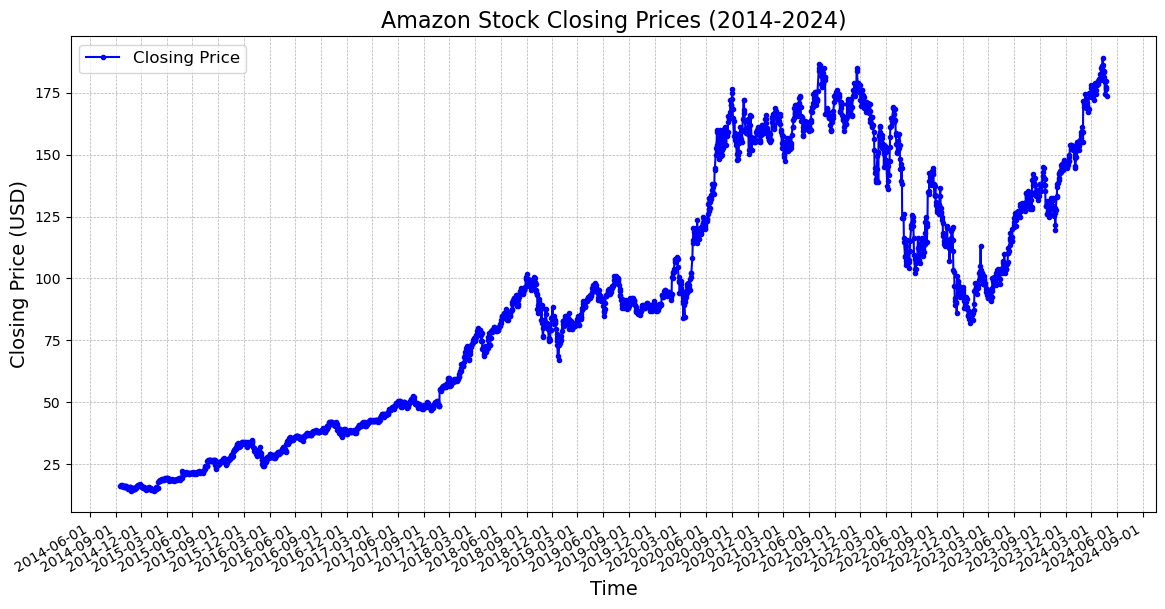

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 假设 Close 是包含日期索引和收盘价的 DataFrame，确保你有加载数据的代码
# Close = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# 提取十年间所有的数据点
x = Close.index  # 日期索引
y = Close['Close'].values  # 收盘价

# 设置图形大小
plt.figure(figsize=(14, 7))

# 自定义标记样式和线条样式
plt.plot(x, y, marker='o', color='blue', linestyle='-', linewidth=1.5, markersize=3, label="Closing Price")

# 设置 x 轴以正确解释日期
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 每三个月显示一次日期

# 调整日期刻度标签布局
plt.gcf().autofmt_xdate()

# 添加网格线、标题和标签
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.title('Amazon Stock Closing Prices (2014-2024)', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)

# 添加图例
plt.legend(fontsize=12)

# 显示图形
plt.show()

# Baseline - Naive Prediction

MAE: 2.143834
RMSE: 2.906567
R^2: 0.772896
MGD: 0.000291
MPD: 0.049508


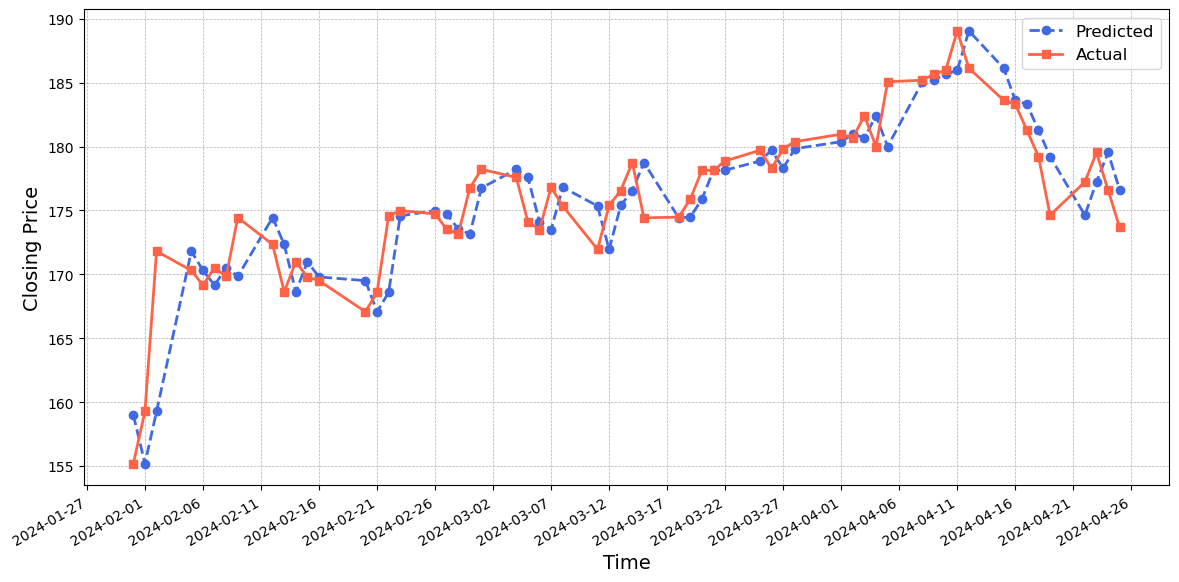

In [5]:
y_test = Close['Close'][-60:].values
baseline = Close['Close'].shift(1)[-60:].values


predict = baseline

x = Close[-60:].index

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

"""The best case for both diff in the following is small positive numbers
which means the prediction is accurate and the trading strategy is possible.""" 

compare = pd.DataFrame(columns=['Actual','Predict'])
compare['Actual'] = y_test
compare['Predict'] = predict

print('MAE: %f' % mae)
print('RMSE: %f' % rmse)
print('R^2: %f' % r2)
print('MGD: %f' % mgd)
print('MPD: %f' % mpd)


# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Attention, Concatenate, Flatten
from tensorflow.keras.models import Model

# Define input layer
inputs = Input(shape=(X_train.shape[1], 1))

# Reshape input
# reshaped_input = inputs.reshape((X_train.shape[1],))
# Reshape input
reshaped_input = Flatten()(inputs)

# Define attention layer
attention_probs = Dense(X_train.shape[1], activation='softmax')(reshaped_input)
attention_mul = Concatenate()([reshaped_input, attention_probs])

# Define hidden layers
hidden = Dense(64, activation='relu')(attention_mul)
output = Dense(1)(hidden)

# Define Attention_model
Attention_model = Model(inputs=inputs, outputs=output)

# Compile Attention_model
Attention_model.compile(optimizer='adam', loss='mean_squared_error')

# Train Attention_model
Attention_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Attention_predicted_price = Attention_model.predict(X_test)
Attention_predicted_price = scaled_y.inverse_transform(Attention_predicted_price)

Attention_rmse = math.sqrt(mean_squared_error(y_test, Attention_predicted_price))
print("The root mean squared error is {}.".format(Attention_rmse))

# Vanilla LSTM

In [12]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 5
# convert into input/output
X, y = split_sequences(data, n_steps)

X_train, X_test =X[:-60], X[-60:]
y_train, y_test =  y[:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(40, activation='sigmoid', input_shape=(n_steps, n_features)))
#model.add(Dropout(0.01))
#model.add(RepeatVector(2))
#model.add(LSTM(20, activation='relu'))#, return_sequences=True))
#model.add(TimeDistributed(Dense(n_features)))
model.add(Dense(1))#,  activation='sigmoid'))
model.compile(optimizer='RMSprop', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
# fit model
model.fit(X_train, y_train, epochs=300,batch_size=32, verbose=0)
# demonstrate prediction
model.summary()
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])

mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 40)                12800     
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 12841 (50.16 KB)
Trainable params: 12841 (50.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
MAE before inverse Scaling: 0.025633
RMSE before inverse Scaling: 0.029751
R^2 before inverse Scaling: 0.882626
MGD before inverse Scaling: 0.000412
MPD before inverse Scaling: 0.000603
MAE after inverse scaling: 1.814033
RMSE after inverse scaling: 2.103577
R^2 after inverse scaling: 0.881128
MGD after inverse scaling: 0.000142
MPD after inverse scaling: 0.025087
CPU times: total: 7.31 s
Wall time: 38 s


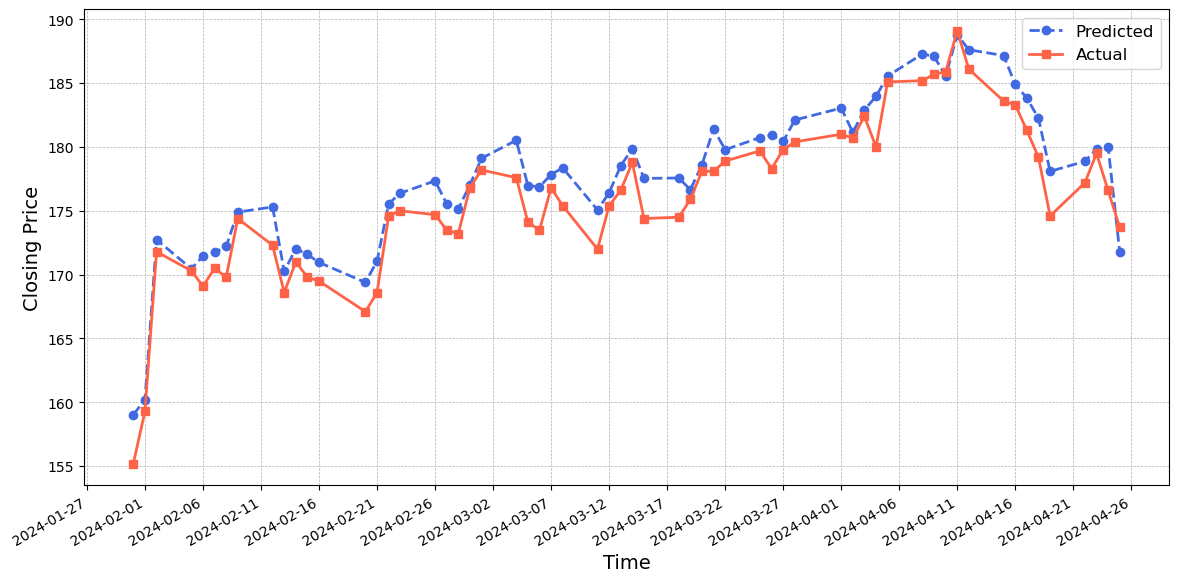

In [13]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

In [12]:
%%time
import numpy as np
from numpy import array
from sklearn.preprocessing import PowerTransformer
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_gamma_deviance, mean_poisson_deviance
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, MultiHeadAttention
from tensorflow.keras.optimizers import RMSprop

# Helper function to split sequences
def split_sequences(sequences, n_steps):
    X, y = [], []
    for i in range(len(sequences) - n_steps):
        seq_x, seq_y = sequences[i:i+n_steps, :-1], sequences[i+n_steps, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Data preparation steps
scaler = PowerTransformer()
data = scaler.fit_transform(Close.values)  # Ensure 'Close' is defined in your context

y_scaler = PowerTransformer()
y_prime = y_scaler.fit_transform(Close.values[:, -1].reshape(-1, 1))

n_steps = 5
X, y = split_sequences(data, n_steps)

X_train, X_test = X[:-60], X[-60:]
y_train, y_test = y[:-60], y[-60:]
n_features = X.shape[2]

# Model definition using Functional API
inputs = Input(shape=(n_steps, n_features))
lstm_out = LSTM(40, activation='sigmoid', return_sequences=True)(inputs)
attention_output = MultiHeadAttention(num_heads=2, key_dim=40)(lstm_out, lstm_out, lstm_out)
lstm_out2 = LSTM(20, return_sequences=False)(attention_output)
outputs = Dense(1)(lstm_out2)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=RMSprop(), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

# Model summary
model.summary()


test = []
for i in range(60):

    test.append(X_test[i])

yhat = model.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])

mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 5, 39)]              0         []                            
                                                                                                  
 lstm_8 (LSTM)               (None, 5, 40)                12800     ['input_3[0][0]']             
                                                                                                  
 multi_head_attention_3 (Mu  (None, 5, 40)                13080     ['lstm_8[0][0]',              
 ltiHeadAttention)                                                   'lstm_8[0][0]',              
                                                                     'lstm_8[0][0]']              
                                                                                            

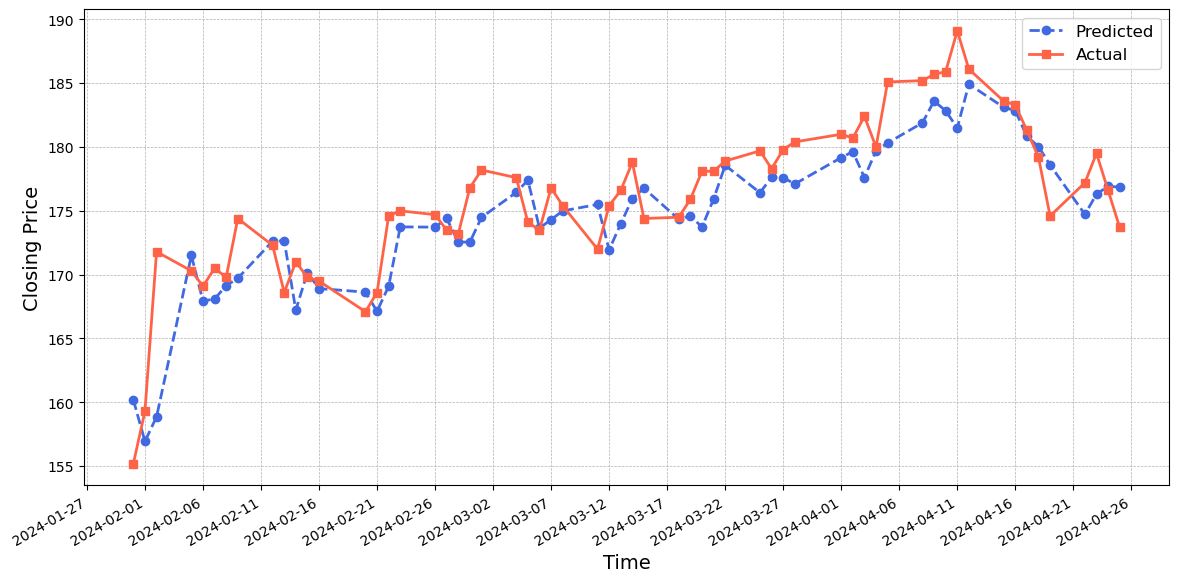

In [13]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

# Stacked LSTM

In [11]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 5
# convert into input/output
X, y = split_sequences(data, n_steps)

X_train, X_test =X[:-60], X[-60:]
y_train, y_test =  y[:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(64, activation='sigmoid', return_sequences=True,input_shape=(n_steps, n_features)))
#model.add(RepeatVector(2))
#model.add(LSTM(50, activation='relu', return_sequences=True))
#model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid'))
#model.add(TimeDistributed(Dense(n_features)))
model.add(Dense(1))#,  activation='sigmoid'))
model.compile(optimizer='RMSprop', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
# fit model
model.fit(X_train, y_train, epochs=200,batch_size=32, verbose=0)
model.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])

mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 5, 64)             26624     
                                                                 
 lstm_6 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 39073 (152.63 KB)
Trainable params: 39073 (152.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
MAE before inverse Scaling: 0.058631
RMSE before inverse Scaling: 0.061531
R^2 before inverse Scaling: 0.497951
MGD before inverse Scaling: 0.001835
MPD before inverse Scaling: 0.002631
MAE after inverse scaling: 4.121733
RMSE after inverse scaling: 4.331738
R^2 after inverse sca

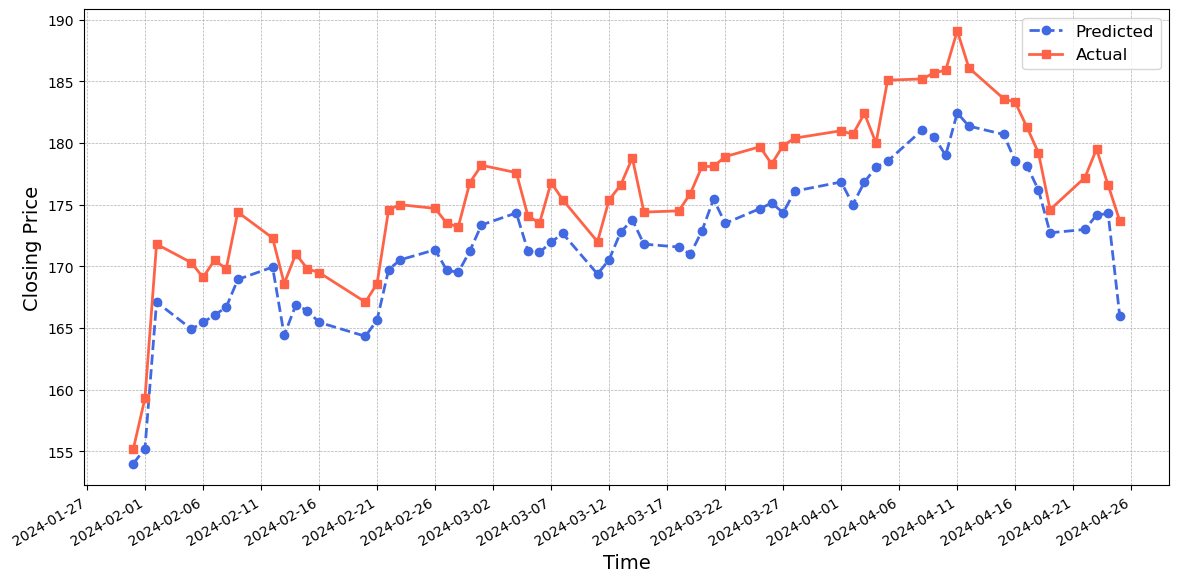

In [12]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

# LSTM CNN (LRCN)

In [13]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

X = data[:,:-1]
X = X.reshape((X.shape[0], X.shape[1],1))

subsequences = 13
timesteps = X.shape[1]//subsequences
X = X.reshape((X.shape[0], subsequences, timesteps, 1))

y = data[:,-1]
y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 5
# convert into input/output
#X, y = split_sequences(data, n_steps)

X_train, X_test =X[:-60], X[-60:]
y_train, y_test =  y[:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[1]
size = 50
FORECAST_RANGE = 4
# define model(n_steps, n_features)


model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=32, kernel_size=2, activation='relu'), input_shape=(None, X.shape[2], X.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(40, activation='relu'))
model_cnn_lstm.add(Dense(1))

model_cnn_lstm.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
# fit model
model_cnn_lstm.fit(X_train, y_train, epochs=500,batch_size=32, verbose=0)

model_cnn_lstm.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model_cnn_lstm.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])
    
mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_9 (TimeDi  (None, None, 2, 32)       96        
 stributed)                                                      
                                                                 
 time_distributed_10 (TimeD  (None, None, 1, 32)       0         
 istributed)                                                     
                                                                 
 time_distributed_11 (TimeD  (None, None, 32)          0         
 istributed)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 40)                11680     
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                      

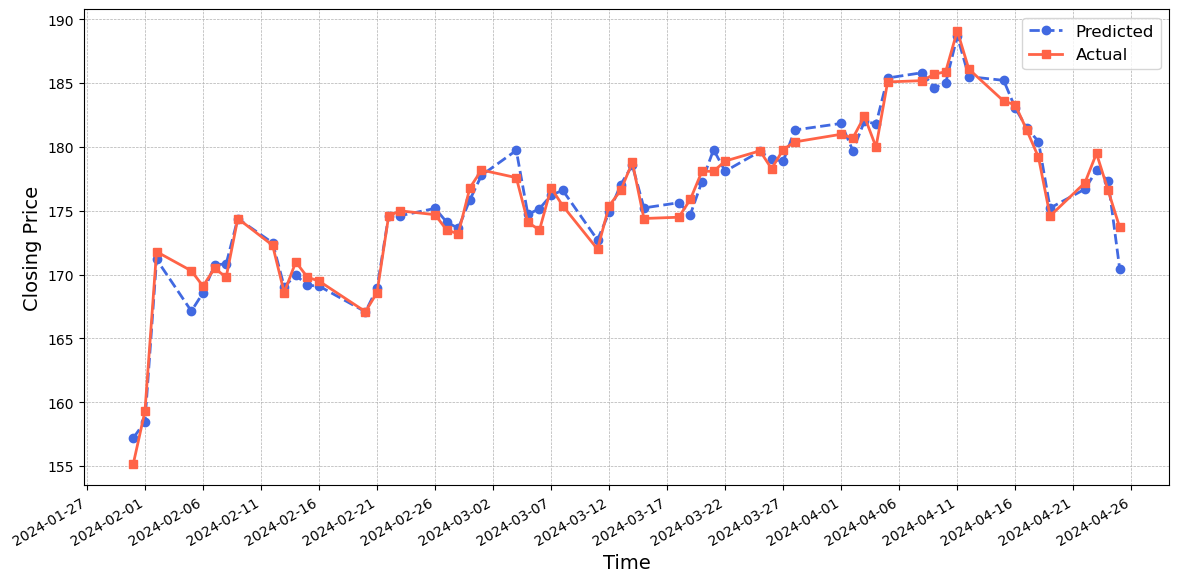

In [14]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

In [14]:
%%time
import numpy as np
from numpy import array
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_gamma_deviance, mean_poisson_deviance
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, MultiHeadAttention

# Data processing
scaler = PowerTransformer()
data = scaler.fit_transform(Close.values)  # Close must be defined in your context

X = data[:, :-1]
X = X.reshape((X.shape[0], X.shape[1], 1))

subsequences = 13
timesteps = X.shape[1] // subsequences
X = X.reshape((X.shape[0], subsequences, timesteps, 1))

y = data[:, -1]
y_scaler = PowerTransformer()
y_prime = y_scaler.fit_transform(Close.values[:, -1].reshape(-1, 1))

X_train, X_test = X[:-60], X[-60:]
y_train, y_test = y[:-60], y[-60:]

# Model building using Functional API
inputs = Input(shape=(subsequences, timesteps, 1))
x = TimeDistributed(Conv1D(filters=32, kernel_size=2, activation='relu'))(inputs)
x = TimeDistributed(MaxPooling1D(pool_size=2))(x)
x = TimeDistributed(Flatten())(x)
x = LSTM(40, activation='relu', return_sequences=True)(x)
x = MultiHeadAttention(num_heads=2, key_dim=40)(x, x, x)  # Self-attention
x = LSTM(40, activation='relu')(x)
outputs = Dense(1)(x)

model_cnn_lstm = Model(inputs, outputs)
model_cnn_lstm.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_cnn_lstm.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)
model_cnn_lstm.summary()

test = []
for i in range(60):

    test.append(X_test[i])

yhat = model_cnn_lstm.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])
    
mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 13, 3, 1)]           0         []                            
                                                                                                  
 time_distributed (TimeDist  (None, 13, 2, 32)            96        ['input_4[0][0]']             
 ributed)                                                                                         
                                                                                                  
 time_distributed_1 (TimeDi  (None, 13, 1, 32)            0         ['time_distributed[0][0]']    
 stributed)                                                                                       
                                                                                            

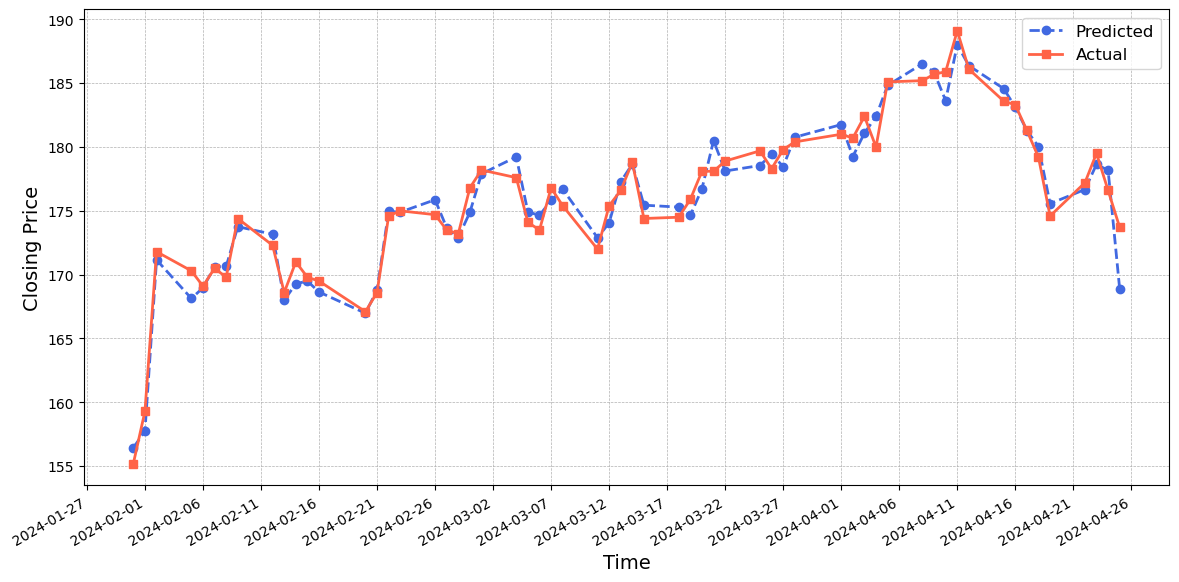

In [15]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

In [7]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

X = data[:,:-1]
X = X.reshape((X.shape[0], X.shape[1],1))

subsequences = 13
timesteps = X.shape[1]//subsequences
X = X.reshape((X.shape[0], subsequences, timesteps, 1))

y = data[:,-1]
y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 5
# convert into input/output
#X, y = split_sequences(data, n_steps)

X_train, X_test =X[:-60], X[-60:]
y_train, y_test =  y[:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[1]
size = 50
FORECAST_RANGE = 4
# define model(n_steps, n_features)


model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=32, kernel_size=2, activation='relu'), input_shape=(None, X.shape[2], X.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(Bidirectional(LSTM(32, activation='sigmoid', return_sequences=True), input_shape=(n_steps, n_features)))
model_cnn_lstm.add(LSTM(40, activation='relu',return_sequences=True))
model_cnn_lstm.add(GRU(32,activation='sigmoid'))
model_cnn_lstm.add(Dense(1))

model_cnn_lstm.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
# fit model
model_cnn_lstm.fit(X_train, y_train, epochs=500,batch_size=32, verbose=0)

model_cnn_lstm.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model_cnn_lstm.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])
    
mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDi  (None, None, 2, 32)       96        
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, None, 1, 32)       0         
 stributed)                                                      
                                                                 
 time_distributed_5 (TimeDi  (None, None, 32)          0         
 stributed)                                                      
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 lstm_3 (LSTM)               (None, None, 40)         

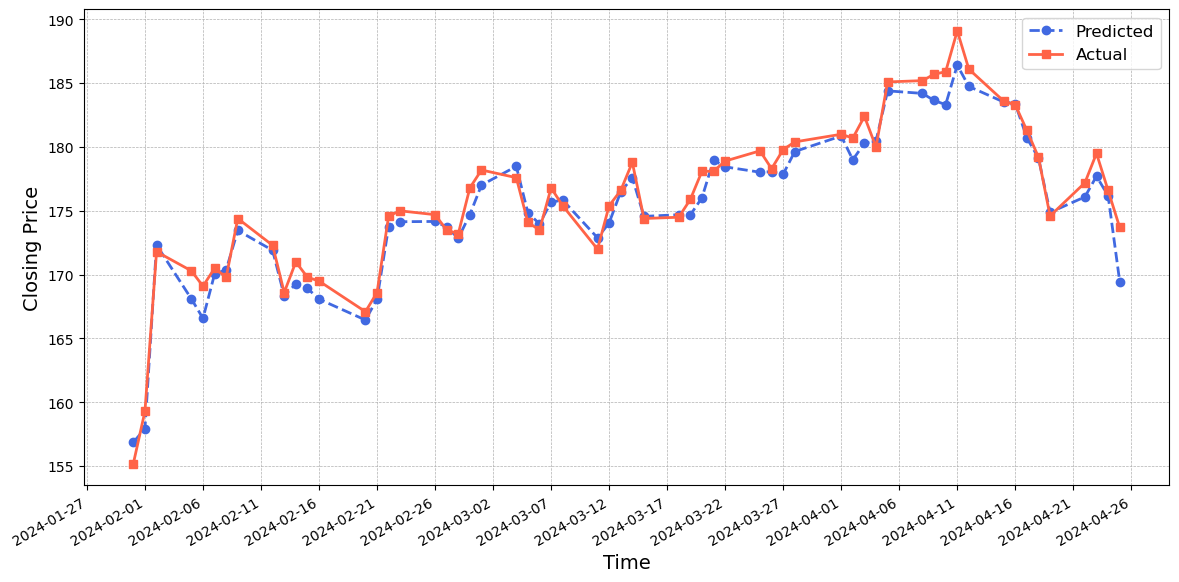

In [8]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

In [9]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

X = data[:,:-1]
X = X.reshape((X.shape[0], X.shape[1],1))

subsequences = 13
timesteps = X.shape[1]//subsequences
X = X.reshape((X.shape[0], subsequences, timesteps, 1))

y = data[:,-1]
y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 5
# convert into input/output
#X, y = split_sequences(data, n_steps)

X_train, X_test =X[:-60], X[-60:]
y_train, y_test =  y[:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[1]
size = 50
FORECAST_RANGE = 4
# define model(n_steps, n_features)


model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=32, kernel_size=2, activation='relu'), input_shape=(None, X.shape[2], X.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(Bidirectional(LSTM(32, activation='sigmoid', return_sequences=True), input_shape=(n_steps, n_features)))
model_cnn_lstm.add(GRU(32,activation='sigmoid'))
model_cnn_lstm.add(Dense(1))

model_cnn_lstm.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
# fit model
model_cnn_lstm.fit(X_train, y_train, epochs=500,batch_size=32, verbose=0)

model_cnn_lstm.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model_cnn_lstm.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])
    
mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDi  (None, None, 2, 32)       96        
 stributed)                                                      
                                                                 
 time_distributed_7 (TimeDi  (None, None, 1, 32)       0         
 stributed)                                                      
                                                                 
 time_distributed_8 (TimeDi  (None, None, 32)          0         
 stributed)                                                      
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 gru_1 (GRU)                 (None, 32)               

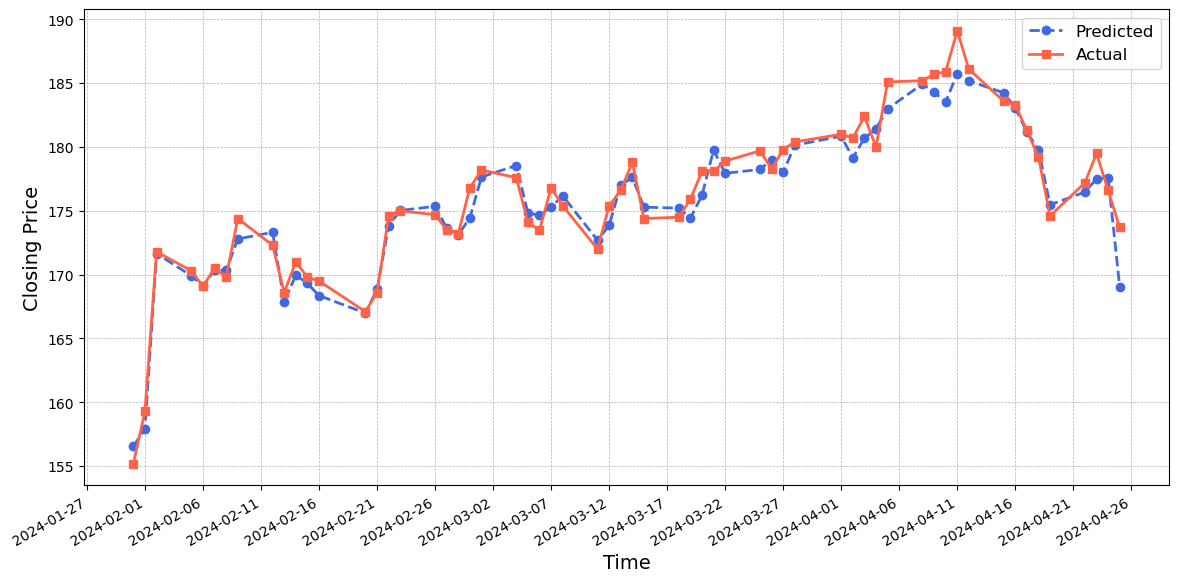

In [10]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

In [16]:
%%time
import numpy as np
from numpy import array
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_gamma_deviance, mean_poisson_deviance
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, GRU, Bidirectional, MultiHeadAttention

# Data processing
scaler = PowerTransformer()
data = scaler.fit_transform(Close.values)  # Ensure Close is defined in your context

X = data[:,:-1]
X = X.reshape((X.shape[0], X.shape[1], 1))

subsequences = 13
timesteps = X.shape[1] // subsequences
X = X.reshape((X.shape[0], subsequences, timesteps, 1))

y = data[:, -1]
y_scaler = PowerTransformer()
y_prime = y_scaler.fit_transform(Close.values[:, -1].reshape(-1, 1))

X_train, X_test = X[:-60], X[-60:]
y_train, y_test = y[:-60], y[-60:]

# Model building using Functional API
inputs = Input(shape=(subsequences, timesteps, 1))
x = TimeDistributed(Conv1D(filters=32, kernel_size=2, activation='relu'))(inputs)
x = TimeDistributed(MaxPooling1D(pool_size=2))(x)
x = TimeDistributed(Flatten())(x)
x = Bidirectional(LSTM(32, return_sequences=True, activation='sigmoid'))(x)
x = MultiHeadAttention(num_heads=2, key_dim=32)(x, x, x)  # Self-attention
x = GRU(32, activation='sigmoid')(x)
outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)
model.summary()

test = []
for i in range(60):

    test.append(X_test[i])

yhat = model_cnn_lstm.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])
    
mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 13, 3, 1)]           0         []                            
                                                                                                  
 time_distributed_3 (TimeDi  (None, 13, 2, 32)            96        ['input_5[0][0]']             
 stributed)                                                                                       
                                                                                                  
 time_distributed_4 (TimeDi  (None, 13, 1, 32)            0         ['time_distributed_3[0][0]']  
 stributed)                                                                                       
                                                                                            

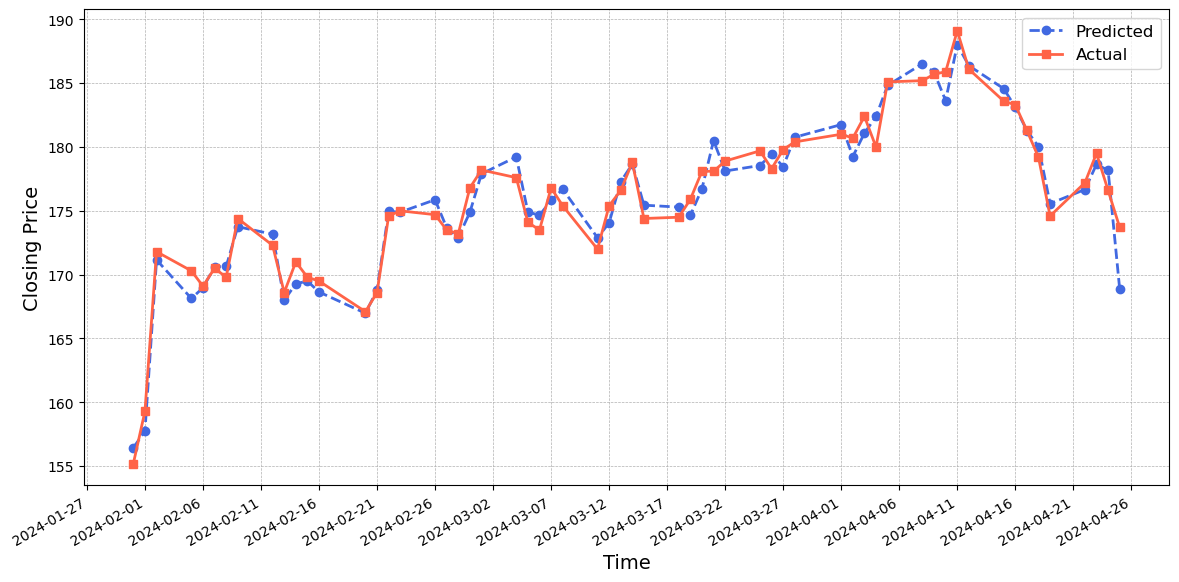

In [17]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

In [19]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

X = data[:,:-1]
X = X.reshape((X.shape[0], X.shape[1],1))

subsequences = 13
timesteps = X.shape[1]//subsequences
X = X.reshape((X.shape[0], subsequences, timesteps, 1))

y = data[:,-1]
y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 5
# convert into input/output
#X, y = split_sequences(data, n_steps)

X_train, X_test =X[:-60], X[-60:]
y_train, y_test =  y[:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[1]
size = 50
FORECAST_RANGE = 4
# define model(n_steps, n_features)


model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=32, kernel_size=2, activation='relu'), input_shape=(None, X.shape[2], X.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(Bidirectional(LSTM(32, activation='sigmoid', return_sequences=True), input_shape=(n_steps, n_features)))
model_cnn_lstm.add(Dense(1))

model_cnn_lstm.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
# fit model
model_cnn_lstm.fit(X_train, y_train, epochs=300,batch_size=32, verbose=0)

model_cnn_lstm.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model_cnn_lstm.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])
    
mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_18 (TimeD  (None, None, 2, 32)       96        
 istributed)                                                     
                                                                 
 time_distributed_19 (TimeD  (None, None, 1, 32)       0         
 istributed)                                                     
                                                                 
 time_distributed_20 (TimeD  (None, None, 32)          0         
 istributed)                                                     
                                                                 
 bidirectional_5 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, None, 1)          

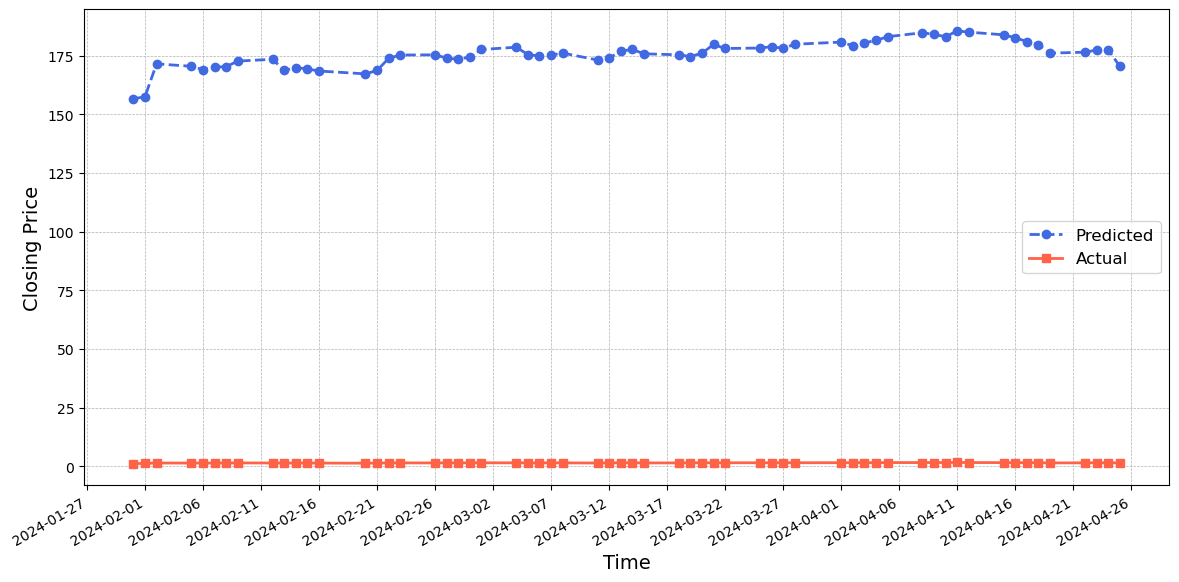

In [18]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

# Bidirectional LSTM (BiLSTM)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 5, 64)             18432     
 al)                                                             
                                                                 
 lstm_12 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
MAE before inverse Scaling: 0.019929
RMSE before inverse Scaling: 0.024844
R^2 before inverse Scaling: 0.918155
MGD before inverse Scaling: 0.000289
MPD before inverse Scaling: 0.000422


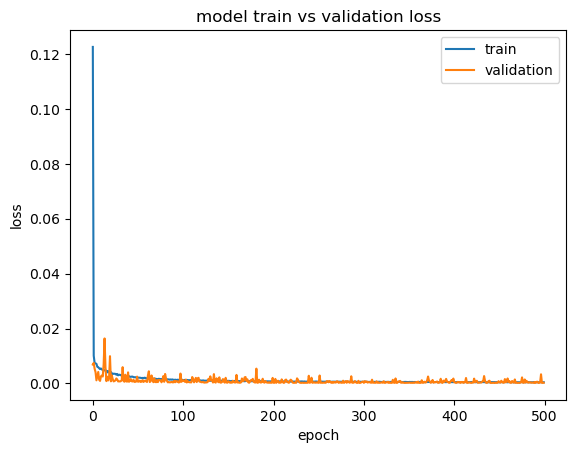

MAE after inverse scaling: 1.407050
RMSE after inverse scaling: 1.754763
R^2 after inverse scaling: 0.917282
MGD after inverse scaling: 0.000100
MPD after inverse scaling: 0.017506
CPU times: total: 26.5 s
Wall time: 1min 51s


In [18]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 5
# convert into input/output
X, y = split_sequences(data, n_steps)

#X_train, X_test =X[:-60], X[-60:]
#y_train, y_test =  y[:-60], y[-60:]

X_train, X_val, X_test = X[:-120,:] , X[-120:-60,:] , X[-60:,:]
y_train, y_val, y_test = y[:-120] ,y[-120:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
"""model.add(LSTM(40, activation='relu', return_sequences=True,input_shape=(n_steps, n_features)))
#model.add(RepeatVector(2))
#model.add(LSTM(50, activation='relu', return_sequences=True))
#model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(LSTM(10, activation='relu'))
#model.add(TimeDistributed(Dense(n_features)))
model.add(Dense(1))#,  activation='sigmoid'))"""
model.add(Bidirectional(LSTM(32, activation='sigmoid', return_sequences=True), input_shape=(n_steps, n_features)))
#model.add(Dropout(rate=0.1))
model.add(LSTM(32, activation='sigmoid'))#, return_sequences=True))
#model.add(Dropout(rate=0.01))
#model.add(LSTM(10, activation='sigmoid', return_sequences=True))
#model.add(Dropout(rate=0.01))
model.add(Dense(1))
#model.add(TimeDistributed(Dense(1))) #, activation= 'sigmoid' )))
#opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer='RMSprop', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

#es = EarlyStopping(monitor= 'val_loss' , min_delta=50)
# fit model
history = model.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=500,batch_size=32, verbose=0)#,callbacks=[es])

model.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])
    
mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model train vs validation loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'validation' ], loc= 'upper right' )
plt.show()

x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)

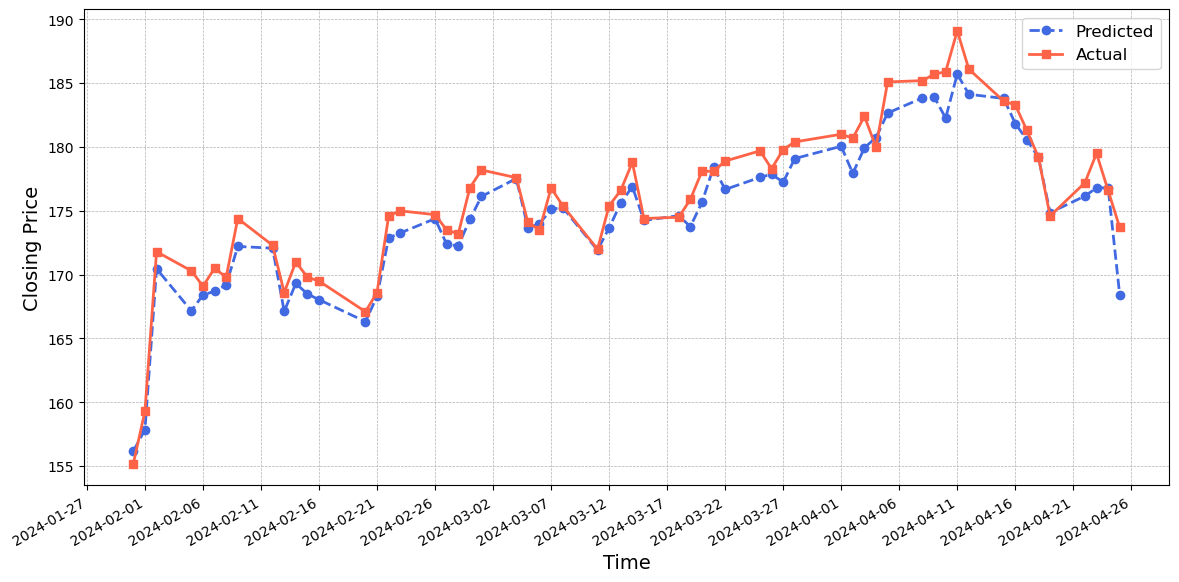

In [19]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

In [23]:
# Data processing
scaler = PowerTransformer()
data = scaler.fit_transform(Close.values)  # Ensure 'Close' is correctly defined

y_scaler = PowerTransformer()
y_prime = y_scaler.fit_transform(Close.values[:,-1].reshape(-1, 1))

n_steps = 5
X, y = split_sequences(data, n_steps)
X_train, X_val, X_test = X[:-120], X[-120:-60], X[-60:]
y_train, y_val, y_test = y[:-120], y[-120:-60], y[-60:]
n_features = X.shape[2]

# Model architecture using Functional API
inputs = Input(shape=(n_steps, n_features))
x = Bidirectional(LSTM(32, return_sequences=True, activation='sigmoid'))(inputs)
attention = MultiHeadAttention(num_heads=2, key_dim=32)(x, x, x)
x = LSTM(32, activation='sigmoid')(attention)
outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=RMSprop(), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=32, verbose=0)

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 5, 39)]              0         []                            
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 5, 64)                18432     ['input_8[0][0]']             
 onal)                                                                                            
                                                                                                  
 multi_head_attention_8 (Mu  (None, 5, 64)                16640     ['bidirectional_2[0][0]',     
 ltiHeadAttention)                                                   'bidirectional_2[0][0]',     
                                                                     'bidirectional_2[0][0]'

MAE before inverse Scaling: 0.072110
RMSE before inverse Scaling: 0.082801
R^2 before inverse Scaling: 0.090854
MGD before inverse Scaling: 0.003460
MPD before inverse Scaling: 0.004857


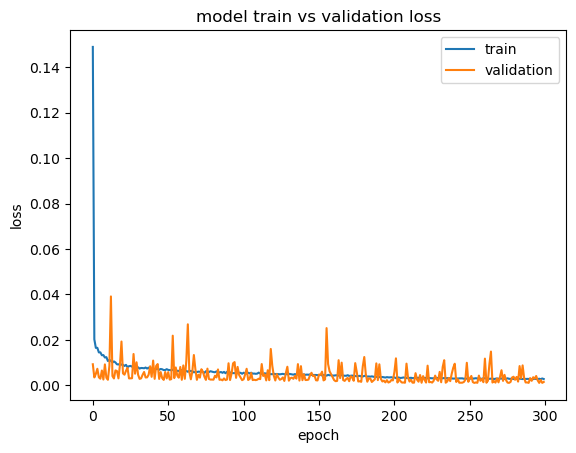

MAE after inverse scaling: 5.064983
RMSE after inverse scaling: 5.814297
R^2 after inverse scaling: 0.091848
MGD after inverse scaling: 0.001139
MPD after inverse scaling: 0.196084


In [24]:
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])
    
mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model train vs validation loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'validation' ], loc= 'upper right' )
plt.show()

x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)

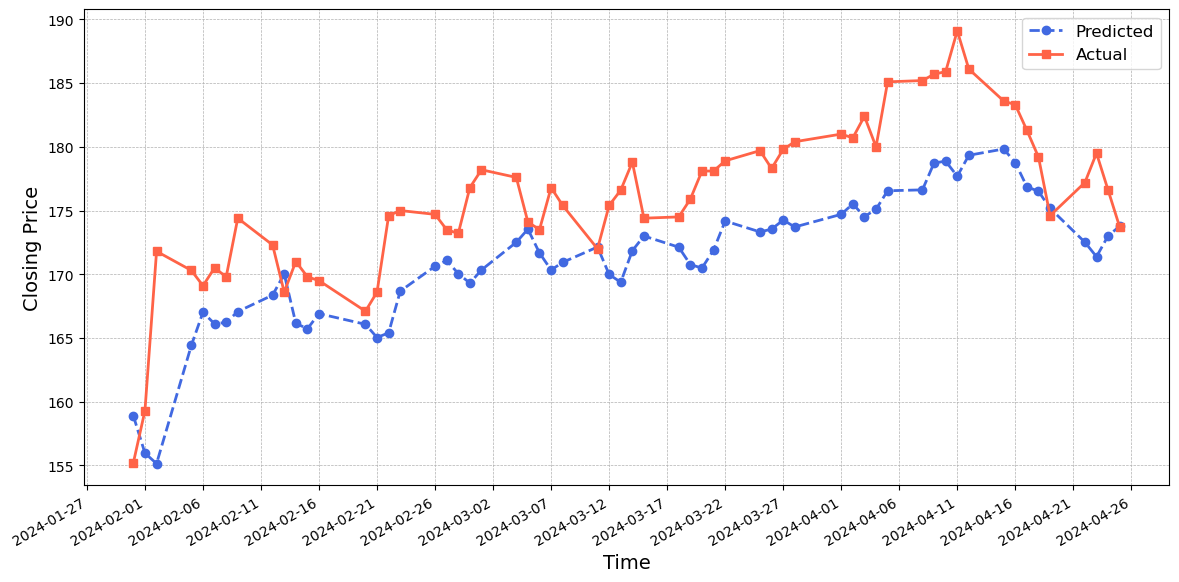

In [25]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

# LSTM_GRU

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 5, 32)             9216      
                                                                 
 lstm_14 (LSTM)              (None, 5, 32)             8320      
                                                                 
 gru (GRU)                   (None, 5, 32)             6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30241 (118.13 KB)
Trainable params: 30241 (118.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
MAE before inver

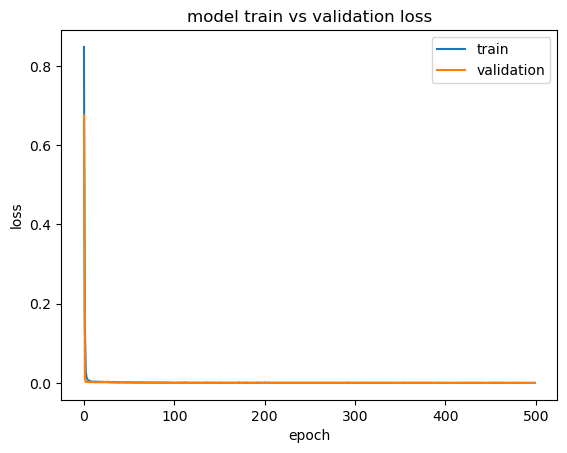

MAE after inverse scaling: 1.003017
RMSE after inverse scaling: 1.243342
R^2 after inverse scaling: 0.958472
MGD after inverse scaling: 0.000050
MPD after inverse scaling: 0.008825
CPU times: total: 36.4 s
Wall time: 2min 56s


In [20]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 5
# convert into input/output
X, y = split_sequences(data, n_steps)

#X_train, X_test =X[:-60], X[-60:]
#y_train, y_test =  y[:-60], y[-60:]

X_train, X_val, X_test = X[:-120,:] , X[-120:-60,:] , X[-60:,:]
y_train, y_val, y_test = y[:-120] ,y[-120:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model

model=Sequential()
model.add(LSTM(32,activation='sigmoid',return_sequences=True,input_shape=(n_steps, n_features)))
model.add(LSTM(32,activation='sigmoid',return_sequences=True))
model.add(GRU(32,activation='sigmoid',return_sequences=True))
model.add(GRU(32,activation='sigmoid'))
model.add(Dense(1))

"""model=Sequential()
model.add(GRU(32, activation='sigmoid',return_sequences=True,input_shape=(n_steps,n_features)))
model.add(GRU(32, activation='sigmoid',return_sequences=True))
model.add(GRU(32, activation='sigmoid'))
model.add(Dropout(0.20))
model.add(Dense(1))"""
#model.add(TimeDistributed(Dense(1))) #, activation= 'sigmoid' )))
#opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer='Adam', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
#es = EarlyStopping(monitor= 'val_loss' , min_delta=50)
# fit model
history = model.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=500,batch_size=32, verbose=0)#,callbacks=[es])

model.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])

mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model train vs validation loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'validation' ], loc= 'upper right' )
plt.show()

x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)



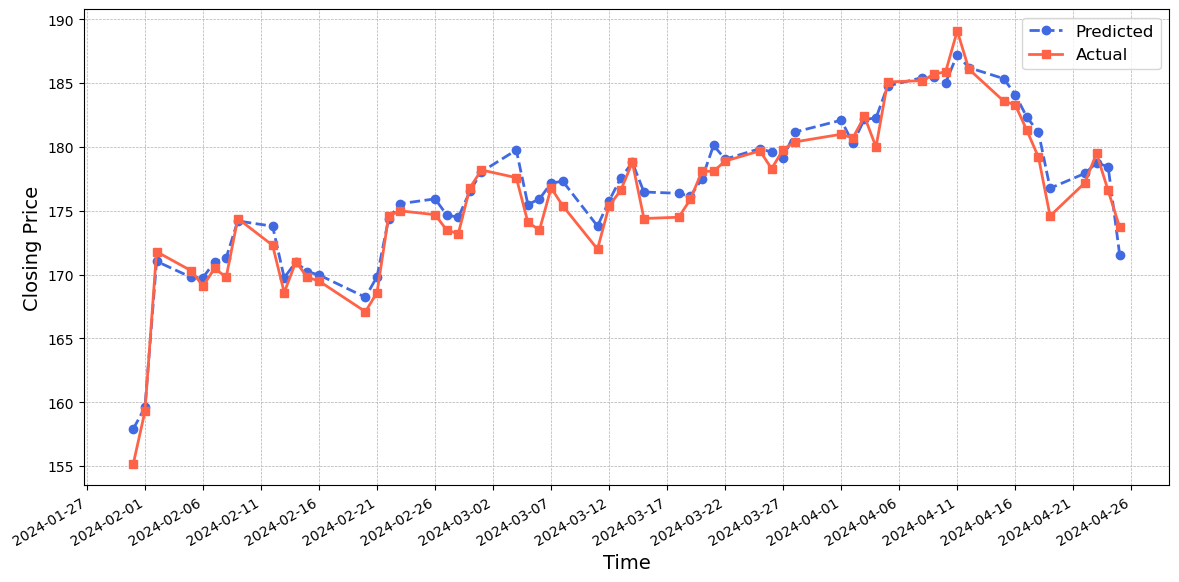

In [21]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 5, 39)]              0         []                            
                                                                                                  
 lstm_13 (LSTM)              (None, 5, 32)                9216      ['input_6[0][0]']             
                                                                                                  
 lstm_14 (LSTM)              (None, 5, 32)                8320      ['lstm_13[0][0]']             
                                                                                                  
 multi_head_attention_6 (Mu  (None, 5, 32)                8416      ['lstm_14[0][0]',             
 ltiHeadAttention)                                                   'lstm_14[0][0]',       

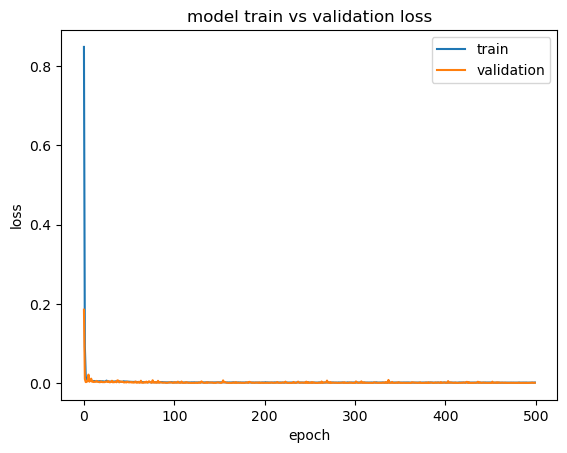

MAE after inverse scaling: 2.140150
RMSE after inverse scaling: 2.927282
R^2 after inverse scaling: 0.769806
MGD after inverse scaling: 0.000291
MPD after inverse scaling: 0.049852
CPU times: total: 34.5 s
Wall time: 2min 54s


In [18]:
%%time
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_gamma_deviance, mean_poisson_deviance
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, MultiHeadAttention
from tensorflow.keras.optimizers import Adam

# Prepare the data
scaler = PowerTransformer()
data = scaler.fit_transform(Close.values)  # Make sure 'Close' is properly defined

y_scaler = PowerTransformer()
y_prime = y_scaler.fit_transform(Close.values[:,-1].reshape(-1, 1))

n_steps = 5
X, y = split_sequences(data, n_steps)
X_train, X_val, X_test = X[:-120], X[-120:-60], X[-60:]
y_train, y_val, y_test = y[:-120], y[-120:-60], y[-60:]
n_features = X.shape[2]

# Model architecture using Functional API
inputs = Input(shape=(n_steps, n_features))
x = LSTM(32, activation='sigmoid', return_sequences=True)(inputs)
x = LSTM(32, activation='sigmoid', return_sequences=True)(x)
attention = MultiHeadAttention(num_heads=2, key_dim=32)(x, x, x)
x = GRU(32, activation='sigmoid', return_sequences=True)(attention)
x = GRU(32, activation='sigmoid')(x)
outputs = Dense(1)(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32, verbose=0)

model.summary()

# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])

mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)
mgd = mean_gamma_deviance(y_test, prediction)
mpd = mean_poisson_deviance(y_test, prediction)

print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)
print('R^2 before inverse Scaling: %f' % r2)
print('MGD before inverse Scaling: %f' % mgd)
print('MPD before inverse Scaling: %f' % mpd)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model train vs validation loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'validation' ], loc= 'upper right' )
plt.show()

x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
mgd = mean_gamma_deviance(y_test, predict)
mpd = mean_poisson_deviance(y_test, predict)

print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)
print('R^2 after inverse scaling: %f' % r2)
print('MGD after inverse scaling: %f' % mgd)
print('MPD after inverse scaling: %f' % mpd)


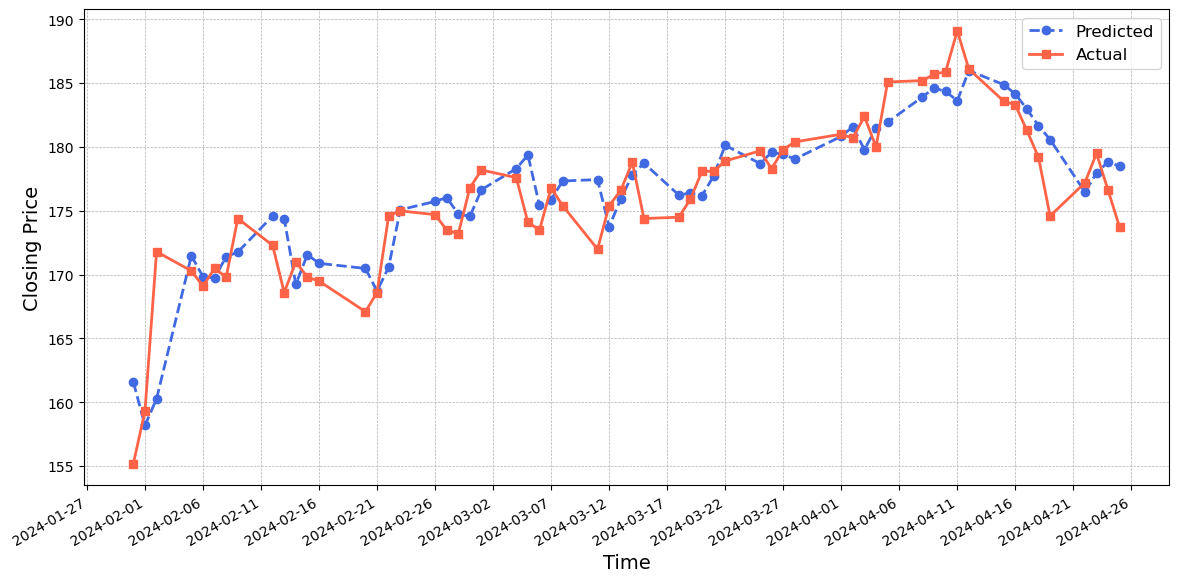

In [19]:
# Set figure size
plt.figure(figsize=(14, 7))

# Customize marker styles and line styles
plt.plot(x, predict, marker='o', color='royalblue', linestyle='dashed', linewidth=2, markersize=6, label="Predicted")
plt.plot(x, y_test, marker='s', color='tomato', linestyle='-', linewidth=2, markersize=6, label="Actual")

# Set the x-axis to interpret dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # adjust interval as needed

# Improve layout of date ticks
plt.gcf().autofmt_xdate()

# Add gridlines, titles, and labels
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

# ATTENTION

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Drop the 'Date' column and normalize features
features = Close.drop(['Date', 'Close'], axis=1)
target = Close['Close']

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

# Create sequences of 10 days as input
def create_sequences(input_data, target_data, sequence_length):
    xs = []
    ys = []
    for i in range(len(input_data)-sequence_length):
        xs.append(input_data[i:i+sequence_length])
        ys.append(target_data[i+sequence_length])
    return np.array(xs), np.array(ys)

sequence_length = 10  # Number of days in a sequence
X, y = create_sequences(features_scaled, target_scaled, sequence_length)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now let's define and train the self-attention model
from tensorflow.keras.layers import Dense, Input, MultiHeadAttention, LayerNormalization, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

inputs = Input(shape=(sequence_length, features.shape[1]))
attention = MultiHeadAttention(num_heads=2, key_dim=64)(inputs, inputs)
attention = LayerNormalization()(attention + inputs)
flattened = Flatten()(attention)
outputs = Dense(1, activation='linear')(flattened)  # Linear activation for regression

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)


KeyError: "['Date'] not found in axis"